<center>
    
# Maestría en Inteligencia de Negocios
    
## Seminario de programación

## David Cruz & Miguel Angel Gomez Ardila 

## Taller II
    
## Colombia - 2021
</center>

In [1]:
pip install sodapy

Note: you may need to restart the kernel to use updated packages.


In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sodapy import Socrata

# Unauthenticated client only works with public data sets. Note 'None'
# in place of application token, and no username or password:
client = Socrata("www.datos.gov.co", None)

#Example authenticated client (needed for non-public datasets):
client = Socrata('www.datos.gov.co',
                  'S7R2pUxW65D1NrfXZqLvuCJkS',
                  username="miguelmag1500@gmail.com",
                  password="Miguel123")

# First 2000 results, returned as JSON from API / converted to Python list of
# dictionaries by sodapy.
results = client.get("jbjy-vk9h", limit=150000)

# Convert to pandas DataFrame
results_df = pd.DataFrame.from_records(results)

In [3]:
results_df

,nombre_entidad,nit_entidad,departamento,ciudad,localizaci_n,orden,sector,rama,entidad_centralizada,proceso_de_compra,...,sistema_general_de_participaciones,sistema_general_de_regal_as,recursos_propios_alcald_as_gobernaciones_y_resguardos_ind_genas_,recursos_de_credito,recursos_propios,ultima_actualizacion,codigo_entidad,fecha_inicio_liquidacion,fecha_fin_liquidacion,codigo_proveedor
0,SENA REGIONAL ANTIOQUIA Grupo Administrativo CRNR,899999034,Antioquia,Caldas,"Colombia, Antioquia , Caldas",Nacional,Trabajo,Ejecutivo,Descentralizada,CO1.BDOS.1107643,...,0,0,0,0,0,2020-12-31T00:00:00.000,704161553,2021-01-01 17:00:00,2021-05-01 04:59:00,708133640
1,SUBRED INTEGRADA DE SERVICIOS DE SALUD SUR E.S.E,9009585649,Distrito Capital de Bogotá,Bogotá,"Colombia, Bogotá, Bogotá",Territorial,Salud y Protección Social,Ejecutivo,Descentralizada,CO1.BDOS.646904,...,0,0,0,0,0,2021-07-10T00:00:00.000,702730482,NaN,NaN,703349027
2,SUBRED INTEGRADA DE SERVICIOS DE SALUD SUR OCC...,900959048,Distrito Capital de Bogotá,No Definido,"Colombia, Bogotá, Bogotá",Territorial,Salud y Protección Social,Ejecutivo,Descentralizada,CO1.BDOS.1668838,...,0,0,17557996,0,0,2022-01-07T00:00:00.000,702486788,NaN,NaN,711392191
3,SENA REGIONAL GUAVIARE,899999034,Guaviare,San José Del Guaviare,"Colombia, Guaviare , San José Del Guaviare",Nacional,Educación Nacional,Ejecutivo,Centralizada,CO1.BDOS.1876259,...,0,0,0,0,0,2022-01-12T00:00:00.000,703931881,NaN,NaN,711228015
4,PARQUES NACIONALES NATURALES DE COLOMBIA - DIR...,819000759,Magdalena,Santa Marta,"Colombia, Magdalena , Santa Marta",Territorial,Ambiente y Desarrollo Sostenible,Ejecutivo,Centralizada,CO1.BDOS.1484345,...,0,0,0,0,0,2021-09-14T00:00:00.000,701252041,NaN,NaN,703149922
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
149995,institución universitaria pascual bravo,890980153,Antioquia,Medellín,"Colombia, Antioquia , Medellín",Territorial,Educación Nacional,Ejecutivo,Descentralizada,CO1.BDOS.1996305,...,0,0,17290000,0,0,2021-12-09T00:00:00.000,712721034,NaN,NaN,713726586
149996,INSTITUTO DE CULTURA Y TURISMO DE BOLIVAR,900673958,Bolívar,No Definido,"Colombia, Bolívar",Territorial,Cultura,Ejecutivo,Descentralizada,CO1.BDOS.2531659,...,0,0,0,0,36300000,2022-01-13T00:00:00.000,702331174,NaN,NaN,710192287
149997,ALCALDÍA DEL DISTRITO TURÍSTICO Y CULTURAL DE ...,890480184,Bolívar,Cartagena,"Colombia, Bolívar , Cartagena",Territorial,No aplica/No pertenece,Ejecutivo,Centralizada,CO1.BDOS.1358925,...,0,0,12975000,0,0,2020-12-30T00:00:00.000,703301051,NaN,NaN,709714018
149998,DEPARTAMENTO DEL CASANARE,892099216,Casanare,Yopal,"Colombia, Casanare , Yopal",Territorial,No aplica/No pertenece,Ejecutivo,Centralizada,CO1.BDOS.2120733,...,1804390477,0,0,0,0,2021-08-02T00:00:00.000,706091220,NaN,NaN,703973412


In [4]:
results_df.dtypes

nombre_entidad              object
nit_entidad                 object
departamento                object
ciudad                      object
localizaci_n                object
                             ...  
ultima_actualizacion        object
codigo_entidad              object
fecha_inicio_liquidacion    object
fecha_fin_liquidacion       object
codigo_proveedor            object
Length: 70, dtype: object

#### Estudiar los contratos del sector servicio público en la base SECOP II de contratos electrónicos.

In [5]:
results_df.value_counts('sector')

sector
Servicio Público                                      28929
Salud y Protección Social                             20923
No aplica/No pertenece                                15413
defensa                                               12129
Trabajo                                                8227
Inclusión Social y Reconciliación                      7842
Educación Nacional                                     7187
Ambiente y Desarrollo Sostenible                       6570
Cultura                                                5700
Información Estadística                                4835
Transporte                                             4496
Ley de Justicia                                        4196
deportes                                               3671
Planeación                                             3175
agricultura                                            2922
Industria                                              2651
Hacienda y Crédito Público       

In [6]:
publico_rama = results_df[results_df['sector'] =='Servicio Público']

In [7]:
publico_rama

,nombre_entidad,nit_entidad,departamento,ciudad,localizaci_n,orden,sector,rama,entidad_centralizada,proceso_de_compra,...,sistema_general_de_participaciones,sistema_general_de_regal_as,recursos_propios_alcald_as_gobernaciones_y_resguardos_ind_genas_,recursos_de_credito,recursos_propios,ultima_actualizacion,codigo_entidad,fecha_inicio_liquidacion,fecha_fin_liquidacion,codigo_proveedor
14,SECRETARÍA GENERAL DE LA ALCALDÍA MAYOR DE BOGOTÁ,899999061,Distrito Capital de Bogotá,Bogotá,"Colombia, Bogotá, Bogotá",Territorial,Servicio Público,Ejecutivo,No Definido,CO1.BDOS.1680824,...,0,0,26883774,0,0,2021-12-15T00:00:00.000,700218068,NaN,NaN,705238012
17,MUNICIPIO DE FUNZA - ALCALDÍA DE FUNZA,899999433,Cundinamarca,Funza,"Colombia, Cundinamarca , Funza",Territorial,Servicio Público,Ejecutivo,Centralizada,CO1.BDOS.2482056,...,0,0,35814220,0,0,2022-01-14T00:00:00.000,708618020,NaN,NaN,716295183
18,DEPARTAMENTO DE ANTIOQUIA,890900286,Antioquia,Medellín,"Colombia, Antioquia , Medellín",Territorial,Servicio Público,Ejecutivo,No Definido,CO1.BDOS.1626219,...,0,0,1799995050,0,0,2021-09-16T00:00:00.000,700256027,NaN,NaN,704906007
24,MUNICIPIO DE PEREIRA-OFICIAL,891480030,Risaralda,Pereira,"Colombia, Risaralda , Pereira",Territorial,Servicio Público,Ejecutivo,Descentralizada,CO1.BDOS.2161111,...,0,0,8866667,0,0,2021-12-15T00:00:00.000,702259557,NaN,NaN,710478322
28,DEPARTAMENTO DE ANTIOQUIA,890900286,Antioquia,Medellín,"Colombia, Antioquia , Medellín",Territorial,Servicio Público,Ejecutivo,No Definido,CO1.BDOS.2354852,...,0,0,256200320,0,0,2021-12-20T00:00:00.000,700256027,2022-01-01 17:00:00,2022-12-31 17:00:00,700103047
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
149965,DISTRITO ESPECIAL INDUSTRIAL Y PORTUARIO DE BA...,890102018,Atlántico,Barranquilla,"Colombia, Atlántico , Barranquilla",Territorial,Servicio Público,Ejecutivo,Descentralizada,CO1.BDOS.2152287,...,0,0,5400000,0,0,2021-11-24T00:00:00.000,702442096,NaN,NaN,714651205
149968,MUNICIPIO CANDELARIA,891380038,Valle del Cauca,Candelaria,"Colombia, Valle del Cauca , Candelaria",Territorial,Servicio Público,Ejecutivo,Descentralizada,CO1.BDOS.2501338,...,0,0,32000000,0,0,2022-01-11T00:00:00.000,701400236,NaN,NaN,704259514
149975,SECRETARIA DISTRITAL DE GOBIERNO,899999061,Distrito Capital de Bogotá,Bogotá,"Colombia, Bogotá, Bogotá",Territorial,Servicio Público,Ejecutivo,Centralizada,CO1.BDOS.285254,...,0,0,0,0,0,2019-01-02T00:00:00.000,701427445,NaN,NaN,703429050
149983,SECRETARIA DE AMBIENTE Y DESARROLLO SOSTENIBLE,8903990295,Valle del Cauca,Cali,"Colombia, Valle del Cauca , Cali",Territorial,Servicio Público,Ejecutivo,Centralizada,CO1.BDOS.2125644,...,0,0,10800000,0,0,2021-12-21T00:00:00.000,712356534,NaN,NaN,714481629


In [8]:
publico_rama.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 28929 entries, 14 to 149987
Data columns (total 70 columns):
 #   Column                                                            Non-Null Count  Dtype 
---  ------                                                            --------------  ----- 
 0   nombre_entidad                                                    28929 non-null  object
 1   nit_entidad                                                       28929 non-null  object
 2   departamento                                                      28929 non-null  object
 3   ciudad                                                            28929 non-null  object
 4   localizaci_n                                                      28929 non-null  object
 5   orden                                                             28929 non-null  object
 6   sector                                                            28929 non-null  object
 7   rama                                  

1. Hacer una exploración por las siguientes variables que permita entender ¿qué miden? ¿qué categorías admiten? ¿Cómo afecta el problema que nos compete?

Orden
Rama
Departamento
Tipo de Contrato
Estado Contrato
Es Pyme

### Selección de las variables

Para el responder las preguntas de este numeral, en el siguiente bloque de codigo se creará un dataframe con las siguientes variables: Orden, rama, departamento, tipo de contrato, estado contrato, es pyme.

In [9]:
principal_df= publico_rama.loc[:,['orden','rama','departamento','tipo_de_contrato','estado_contrato','es_pyme']]#seleccionando las columnas del data frame meta_ciudad 
#para trabajar en el numeral 1 

In [10]:
principal_df

,orden,rama,departamento,tipo_de_contrato,estado_contrato,es_pyme
14,Territorial,Ejecutivo,Distrito Capital de Bogotá,Prestación de servicios,Modificado,No
17,Territorial,Ejecutivo,Cundinamarca,Prestación de servicios,En ejecución,No
18,Territorial,Ejecutivo,Antioquia,Otro,En ejecución,No
24,Territorial,Ejecutivo,Risaralda,Prestación de servicios,En ejecución,No
28,Territorial,Ejecutivo,Antioquia,Otro,En ejecución,No
...,...,...,...,...,...,...
149965,Territorial,Ejecutivo,Atlántico,Prestación de servicios,En ejecución,No
149968,Territorial,Ejecutivo,Valle del Cauca,Prestación de servicios,En ejecución,No
149975,Territorial,Ejecutivo,Distrito Capital de Bogotá,Prestación de servicios,Modificado,No
149983,Territorial,Ejecutivo,Valle del Cauca,Prestación de servicios,Modificado,No


En el siguiente bloque de código se puede ver que no hay datos perdidos, pues cada una de las variables seleccionadas para trabajar comprenden 28049 registros no nulos, la misma cantidad de registros que el dataframe principal <code>principal_df</code>

In [11]:
principal_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 28929 entries, 14 to 149987
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   orden             28929 non-null  object
 1   rama              28929 non-null  object
 2   departamento      28929 non-null  object
 3   tipo_de_contrato  28929 non-null  object
 4   estado_contrato   28929 non-null  object
 5   es_pyme           28929 non-null  object
dtypes: object(6)
memory usage: 1.5+ MB


##### variable orden

In [12]:
df_orden_count = principal_df['orden'].value_counts(sort=True)
df_orden_count=pd.DataFrame(df_orden_count)
df_orden_count

,orden
Territorial,26724
Nacional,2185
Corporación Autónoma,20


([<matplotlib.patches.Wedge at 0x1780f07a580>,
 [Text(-1.1657606623104333, 0.2846086404337368, 'Territorial'),
  Text(1.1651397496715874, -0.2871399723745044, 'Nacional'),
  Text(1.199997169396487, -0.0026064229163998533, 'Corporación Autonóma')],
 [Text(-0.6800270530144193, 0.16602170691967977, '92.38 %'),
  Text(0.6796648539750925, -0.16749831721846087, '7.55 %'),
  Text(0.6999983488146173, -0.0015204133678999143, '0.07 %')])

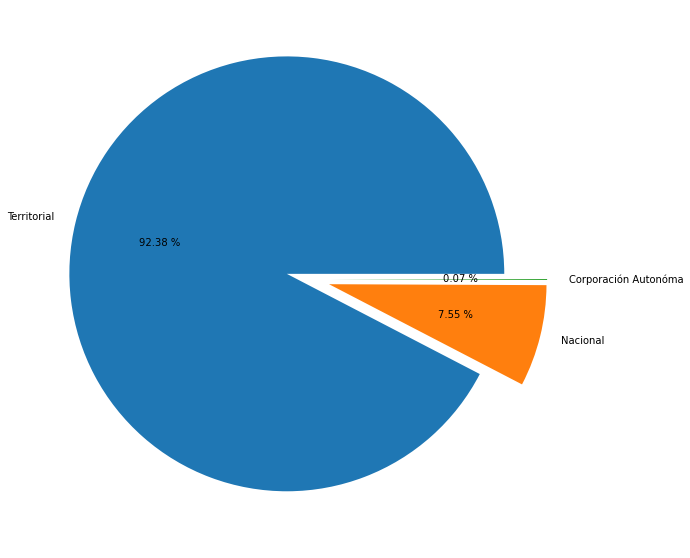

In [13]:
desfase = (0.1,0.1,0.1)
label_o=['Territorial','Nacional','Corporación Autonóma']
fig, ax= plt.subplots(figsize=(15,10))
ax.pie(df_orden_count['orden'], labels=label_o, autopct="%0.2f %%",center=(0, 0),explode=desfase)

- ¿Qué miden? clasifican los contratos en diferentes categoria de acuerdo con el orden

- ¿Qué categorías admiten? admiten tres categorias: territorio, corporación autonóma, nacional.

- ¿Cómo afecta el problema que nos compete? A simple vista se observa que la mayoria de contratos electrónicos en los que se invierte en el sector publico son contratos de orden territorial con 25801 contratos en este orden equivalentes al 91,99% de los contratos electrónicos del sector público.

##### variable rama

In [14]:
df_rama_count = principal_df['rama'].value_counts(sort=True)
df_rama_count=pd.DataFrame(df_rama_count)
df_rama_count

,rama
Ejecutivo,27482
Corporación Autónoma,1347
Judicial,62
Legislativo,38


la siguiente gráfica muestra el porcentaje de cantidad de contratos por rama.

([<matplotlib.patches.Wedge at 0x178109e2dc0>,
 [Text(-1.1852147862433118, 0.18779220023797993, 'ejecutivo'),
  Text(1.1831055702271427, -0.20065196160892113, 'Corporación Autónoma'),
  Text(2.5997080346348396, -0.038963247491195716, 'Judicial'),
  Text(1.1999897819262704, -0.004952097792054168, 'Legislativo')],
 [Text(-0.691375291975265, 0.10954545013882161, '95.00 %'),
  Text(0.690144915965833, -0.11704697760520398, '4.66 %'),
  Text(2.099764181820447, -0.031470315281350386, '0.21 %'),
  Text(0.699994039456991, -0.002888723712031598, '0.13 %')])

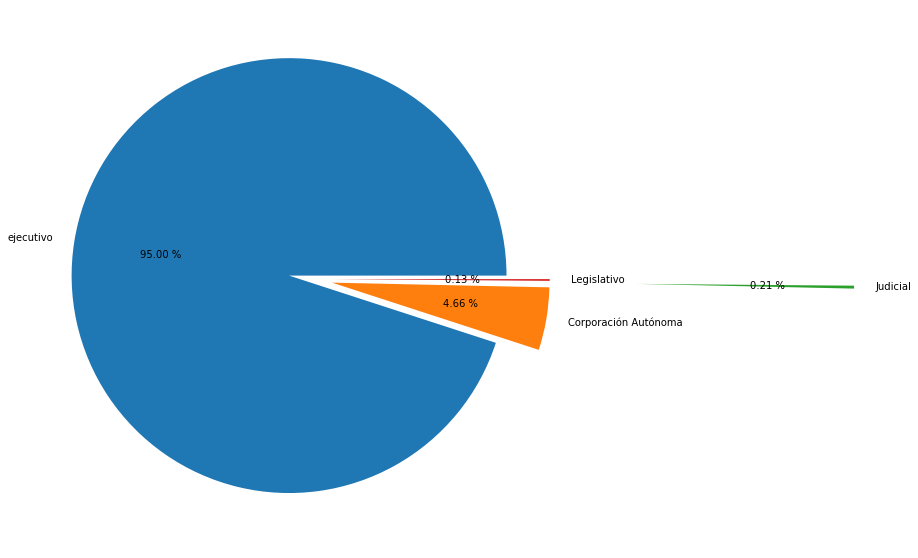

In [15]:
desfase = (0.1,0.1,1.5,0.1)
l=['ejecutivo','Corporación Autónoma','Judicial','Legislativo']
fig, ax= plt.subplots(figsize=(15,10))
ax.pie(df_rama_count['rama'], labels=l, autopct="%0.2f %%",center=(0, 0),explode=desfase)

- ¿Qué miden? clasifican los contratos en diferentes categorías 

- ¿Qué categorías admiten? admiten cuatro categorias: Ejecutivo, Corporación Autónoma, Judicial y Legislativo   

- ¿Cómo afecta el problema que nos compete? A simple vista se observa que la mayoria de contratos electrónicos en los que se invierte en el sector son contratos de la rama ejecutiva con 26671 contratos en esta rama equivalentes al 95.09% de los contratos electrónicos del sector público

#### Departamento 

In [16]:
df_departamento_count = principal_df['departamento'].value_counts(sort=True)
df_departamento_count=pd.DataFrame(df_departamento_count)
df_departamento_count

,departamento
Distrito Capital de Bogotá,5542
Atlántico,2542
Santander,2451
Tolima,1845
Valle del Cauca,1821
Risaralda,1470
Huila,1394
Antioquia,1279
Boyacá,1273
Cauca,962


#### Procentaje de contratos por departamento 

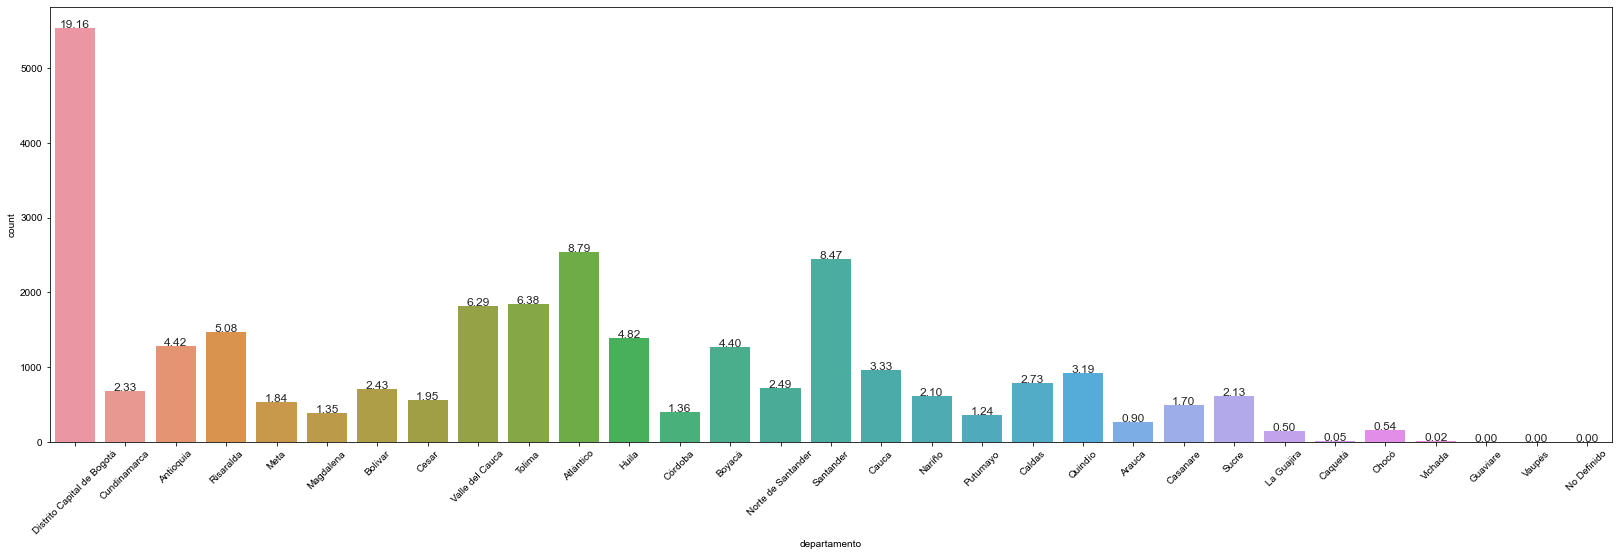

In [17]:
total = len(principal_df['departamento'])
fig, ax= plt.subplots(figsize=(28,8))
ax = sns.countplot(x="departamento", data=principal_df) # for Seaborn version 0.7 and more
#ax.set(ylim=(0,1400))
plt.xticks(rotation=45, horizontalalignment="center")
sns.set(rc={'figure.figsize':(20,8.27)})
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2.,
            height + 3,
            '{:1.2f}'.format((height/total)*100),
            ha="center") 

- ¿Qué miden? esta variable permite identificar a que departamento pertenece cada contrato

- ¿Qué categorías admiten? admiten 31 categorias: 

- ¿Cómo afecta el problema que nos compete? A simple vista se observa que la mayoria de contratos electrónicos en los que se invierte en el sector público son contratos del departamento de Bogotá distrito cápital con 5453 contratos que equivalen al 19.44% de los contratos electrónicos del sector público

#### Tipo

In [18]:
df_tipo_count = principal_df['tipo_de_contrato'].value_counts(sort=True)
df_tipo_count=pd.DataFrame(df_tipo_count)
df_tipo_count

,tipo_de_contrato
Prestación de servicios,25552
Otro,1162
Suministros,531
Compraventa,455
DecreeLaw092/2017,349
Obra,294
Arrendamiento de inmuebles,170
Comodato,131
Interventoría,109
Consultoría,78


#### Porcentaje por cada tipo de contrato 

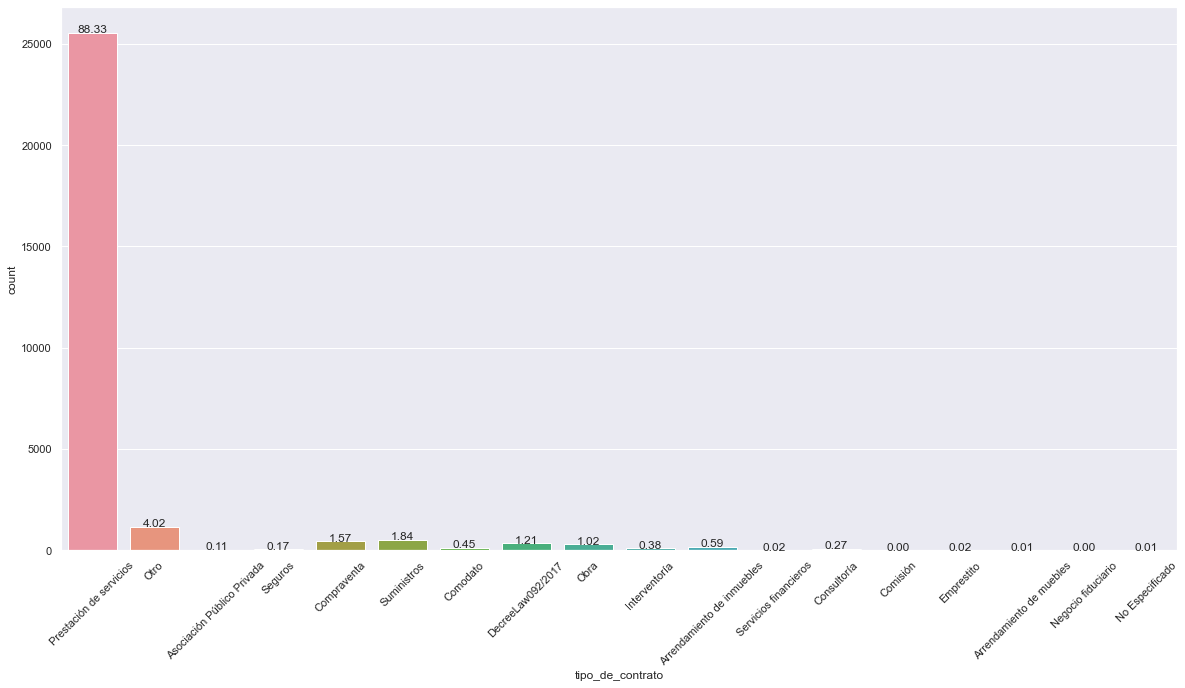

In [19]:
total = len(principal_df['tipo_de_contrato'])
fig, ax= plt.subplots(figsize=(20,10))
ax = sns.countplot(x="tipo_de_contrato", data=principal_df) # for Seaborn version 0.7 and more
#ax.set(ylim=(0,1400))
plt.xticks(rotation=45, horizontalalignment="center")
sns.set(rc={'figure.figsize':(20,8.27)})
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2.,
            height + 3,
            '{:1.2f}'.format((height/total)*100),
            ha="center") 

- ¿Qué miden? esta variable clasifica el tipo de contrato

- ¿Qué categorías admiten? admiten 17 categorias: prestación de servicios, otro, asociación público privada, compraventa, interventoría, suministros, comodato, decree law 092/2017, obra, arrendamiento de inmuebles, consultoría, seguros, emprestito, arrendamiento o muebles, negocio fiduciario, servicios financieros, no especificado.    

- ¿Cómo afecta el problema que nos compete? se puede observar que el 87,14% de los contratos del sector público son de tipo prestación de servicios.

#### Estado del contrato

In [20]:
df_estado_contrat_count = principal_df['estado_contrato'].value_counts(sort=True)
df_estado_contrat_count=pd.DataFrame(df_estado_contrat_count)
df_estado_contrat_count

,estado_contrato
En ejecución,12278
Modificado,5701
Activo,4348
terminado,3158
Borrador,1255
Cerrado,1204
En aprobación,366
enviado Proveedor,333
cedido,172
Suspendido,104


Porcentaje por cada estado de contrato del sector de servicios públicos

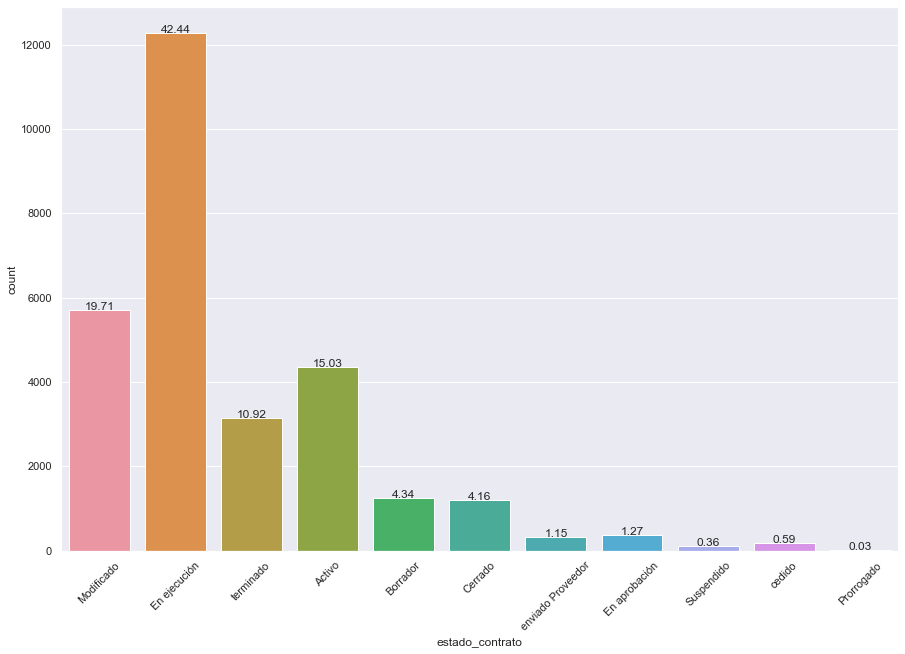

In [21]:
total = len(principal_df['estado_contrato'])
fig, ax= plt.subplots(figsize=(15,10))
ax = sns.countplot(x="estado_contrato", data=principal_df) # for Seaborn version 0.7 and more
#ax.set(ylim=(0,1400))
plt.xticks(rotation=45, horizontalalignment="center")
sns.set(rc={'figure.figsize':(20,8.27)})
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2.,
            height + 3,
            '{:1.2f}'.format((height/total)*100),
            ha="center") 

- ¿Qué miden? esta variable especifica en que etapa está el contrato

- ¿Qué categorías admiten? admiten once categorias: En ejecución, Modificado, Activo, terminado, Borrador, enviado proveedor, Suspendido, Cerrado, en aprobación, cedido, prorrogado.    

- ¿Cómo afecta el problema que nos compete? A simple vista se observa que la mayoria de contratos electrónicos en los que se invierte en el sector público son contratos que se encuentran en estado de ejecución es decir un 46.35%, correspondiente a 13001 contratos. Por otra parte solo se encuentran 11 contratos en prorroga los cuales representan el 0.04%.

#### Es pyme

In [22]:
#es_pyme
df_espyme_count = principal_df['es_pyme'].value_counts(sort=True)
df_espyme_count=pd.DataFrame(df_espyme_count)
df_espyme_count

,es_pyme
No,24706
Si,4223


([<matplotlib.patches.Wedge at 0x17810ea2970>,
 [Text(-0.9863386569840814, 0.4869661730950507, 'No'),
  Text(0.9863386341875484, -0.48696621926889516, 'Si')],
 [Text(-0.5380029038094989, 0.26561791259730033, '85.40 %'),
  Text(0.5380028913750263, -0.26561793778303366, '14.60 %')])

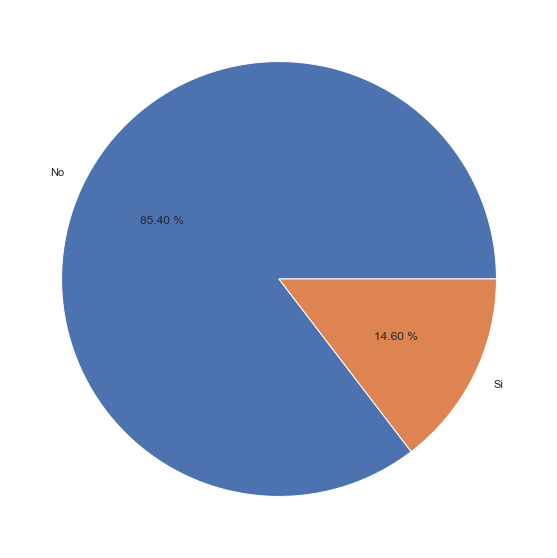

In [23]:
l=['No','Si']
fig, ax= plt.subplots(figsize=(15,10))
ax.pie(df_espyme_count['es_pyme'], labels=l, autopct="%0.2f %%",center=(0, 0))

- ¿Qué miden? identifica si el contrato se hace con una pyme

- ¿Qué categorías admiten? admiten dos categorias: si es pyme, no es pyme 

- ¿Cómo afecta el problema que nos compete? A simple vista se observa que solo el 15.21% de los contratos electrónicos en los que se invierte en el sector público son hechos con pymes, esto equivale a 4265 de 28049 contratos.

## segundo punto 
Crear un reporte (con un miniaplicativo incluido) que permita visualizar lo siguiente:
    
- Suma de valores de contratos del sector servicio público por departamento según un rango de fechas que use la fecha de inicio de contratos. Facilitar la consulta en regiones por año.

- En el reporte anterior incluir cantidad de contratos por región, también deben visualizarse los contratos que no posean fecha de inicio ¿Cuántos son?
- Permita excluir datos atípicos, utilice un criterio debidamente justificado para excluir los contratos de alto valor

In [24]:
import ipywidgets as widgets

numero de contratos por departamento 

In [25]:
df_departamento_count = principal_df['departamento'].value_counts(sort=True)
df_departamento_count=pd.DataFrame(df_departamento_count)
df_departamento_count

,departamento
Distrito Capital de Bogotá,5542
Atlántico,2542
Santander,2451
Tolima,1845
Valle del Cauca,1821
Risaralda,1470
Huila,1394
Antioquia,1279
Boyacá,1273
Cauca,962


Creando dataframe con los datos requeridos para este segundo punto.

In [26]:
DF_2= publico_rama.loc[:,['orden','rama','departamento','tipo_de_contrato','estado_contrato','referencia_del_contrato','id_contrato','fecha_de_inicio_del_contrato','valor_del_contrato','fecha_de_fin_del_contrato']]#seleccionando las columnas del data frame meta_ciudad 
#para trabajar en el numeral 2 

Mostrando informacion acercade la data del dataframe utilizado para el punto 2

In [27]:
DF_2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 28929 entries, 14 to 149987
Data columns (total 10 columns):
 #   Column                        Non-Null Count  Dtype 
---  ------                        --------------  ----- 
 0   orden                         28929 non-null  object
 1   rama                          28929 non-null  object
 2   departamento                  28929 non-null  object
 3   tipo_de_contrato              28929 non-null  object
 4   estado_contrato               28929 non-null  object
 5   referencia_del_contrato       28929 non-null  object
 6   id_contrato                   28929 non-null  object
 7   fecha_de_inicio_del_contrato  25109 non-null  object
 8   valor_del_contrato            28929 non-null  object
 9   fecha_de_fin_del_contrato     28612 non-null  object
dtypes: object(10)
memory usage: 3.4+ MB


#### Cantidad de contratos por departamento

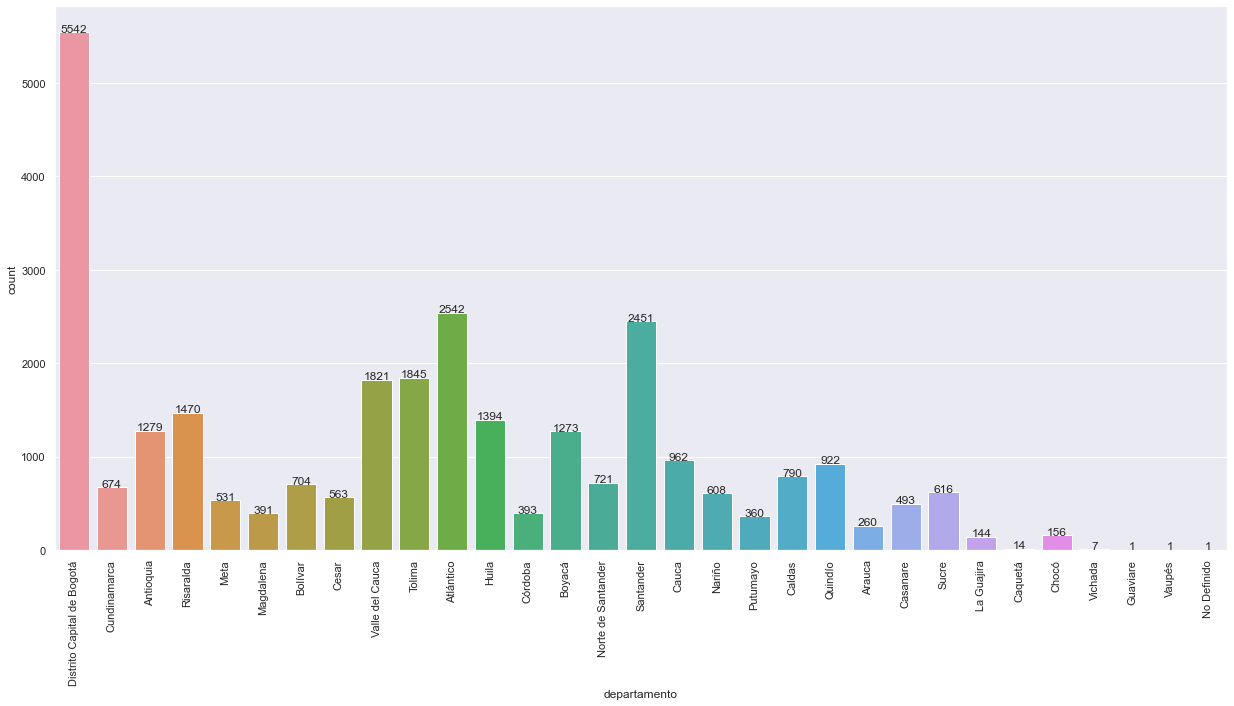

In [28]:
fig, ax= plt.subplots(figsize=(21,10))
ax = sns.countplot(x="departamento", data=DF_2) # for Seaborn version 0.7 and more
plt.xticks(rotation=90, horizontalalignment="center")
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2.,
            height+3 ,
            '{:1.0f}'.format(height),
            ha="center") 
#argumentos de posición
# todo lo que está dentro del parentesis es inerente al texto que se ubica encima de los bloques
# p.get_x= es un argumento posicional del eje x, si lo quito se me descontrolan las etiquetas en el ejex
#height es el argumento posicional de la altura, si lo quito me saldra un mensaje asi : :TypeError: text() missing 1 required positional argument: 's'
# p.get_width()/2 me ayuda a centrar los labels encima del bloque 
#'{:1.0f}' con este cuadro la cantidad de decimales despues del punto, en este caso puse 0 decimales
#.format(): dentro del parentesis de este .format puedo poner operaciones como sacar el porcentaje y me lo mostrará en las labels
#en el eje x seguira mostrando el conteo 

Pasando a entero el valor de los contratos

In [29]:
DF_2['valor_del_contrato']= pd.to_numeric(DF_2["valor_del_contrato"])

importando paquetes para crear aplicativo

In [30]:
from ipywidgets import interact
import ipywidgets as widgets

llamando variable de fechas de inicio 

In [31]:
DF_2['fecha_de_inicio_del_contrato']

14        2021-01-22T00:00:00.000
17        2022-01-07T00:00:00.000
18        2020-12-30T00:00:00.000
24        2021-08-11T00:00:00.000
28        2021-12-03T00:00:00.000
                   ...           
149965    2021-08-09T00:00:00.000
149968    2022-01-07T00:00:00.000
149975    2018-01-08T00:00:00.000
149983    2021-07-27T00:00:00.000
149987                        NaN
Name: fecha_de_inicio_del_contrato, Length: 28929, dtype: object

arreglando error <code>Can only use .dt accessor with datetimelike values</code>

In [32]:
DF_2['fecha_de_inicio_del_contrato'] = pd.to_datetime(DF_2['fecha_de_inicio_del_contrato'], errors='coerce')

creando la variable mes año que agrupa las fechas de inicio en meses

In [33]:
DF_2['Año']=DF_2['fecha_de_inicio_del_contrato'].dt.to_period('Y')

In [71]:
DF_2['Año']

14        2021
17        2022
18        2020
24        2021
28        2021
          ... 
149965    2020
149967    2021
149984    2021
149989    2021
149998    2021
Name: Año, Length: 28883, dtype: period[A-DEC]

Conviertiendo variable Año en string

In [34]:
DF_2['Año']=[str(i) for i in DF_2['Año']]

In [35]:
DF_2['Año']

14        2021
17        2022
18        2020
24        2021
28        2021
          ... 
149965    2021
149968    2022
149975    2018
149983    2021
149987     NaT
Name: Año, Length: 28929, dtype: object

#### Desarrollando aplicativo para la visualización de datos de valor del contrato, cantidad de contrato por año y municipio

In [36]:
depart = widgets.Dropdown(
    description='departamento',
    value='Antioquia',
    options=DF_2['departamento'].unique().tolist()
)
#creando fecha
fecha = widgets.Dropdown(
    description='Fecha:   ',
    value='2015',
    options=DF_2['Año'].unique().tolist()
)
#creando container 
container = widgets.HBox(children=[fecha])


def total_contrato(fecha,depart):
    f= DF_2[DF_2['Año']== fecha]
    f=f[f['departamento']== depart]
    s= f['valor_del_contrato'].sum()
    c=len(f.index)
    print('el valor de los contratos para el año', fecha, 'es', s, 'del departamento', depart, 'con', c, 'contratos' )

In [37]:
interact(total_contrato, fecha=fecha, depart=depart)

interactive(children=(Dropdown(description='Fecha:   ', index=8, options=('2021', '2022', '2020', '2018', 'NaT…

<function __main__.total_contrato(fecha, depart)>

#### Desarrollando aplicativo que permite excluir los contratos electrónicos mas altos 

Se considerarán datos atípicos para este caso a los valores que superen el 1.5*IR del valor de los contratos electrónicos correspondientes a la categoría servicios públicos.
Para este aplicativo solo se tomaron los datos que no se consideran atipicos

In [38]:
depart_2 = widgets.Dropdown(
    description='departamento',
    value='Antioquia',
    options=DF_2['departamento'].unique().tolist()
)
#creando fecha
fecha_2 = widgets.Dropdown(
    description='Fecha:   ',
    value='2015',
    options=DF_2['Año'].unique().tolist()
)
#creando container 
container = widgets.HBox(children=[fecha])



def total_contrato_2(fecha_2,depart_2):
    g= DF_2[DF_2['Año']== fecha_2]
    g=g[g['departamento']== depart_2]
    q3, q1 = np.percentile(g['valor_del_contrato'], [75 ,25])
    atipico = (q3 - q1)*1.5
    g=g[g['valor_del_contrato']<atipico]
    s= g['valor_del_contrato'].sum()
    c=len(g.index)
    print('el valor de los contratos para el año', fecha_2, 'es', s, 'del departamento', depart_2, 'con', c, 'contratos' )
 

In [39]:
interact(total_contrato_2, fecha_2=fecha_2, depart_2=depart_2)

interactive(children=(Dropdown(description='Fecha:   ', index=8, options=('2021', '2022', '2020', '2018', 'NaT…

<function __main__.total_contrato_2(fecha_2, depart_2)>

### Tercer punto

En este punto se van a tomar unicamente los datos considerados como atípicos.

In [40]:
q3, q1 = np.percentile(DF_2['valor_del_contrato'], [75 ,25])
atipico = (q3 - q1)*1.5
contratos_altos=DF_2[DF_2['valor_del_contrato']>atipico]

In [41]:
contratos_altos

,orden,rama,departamento,tipo_de_contrato,estado_contrato,referencia_del_contrato,id_contrato,fecha_de_inicio_del_contrato,valor_del_contrato,fecha_de_fin_del_contrato,Año
18,Territorial,Ejecutivo,Antioquia,Otro,En ejecución,4600011539,CO1.PCCNTR.2089688,2020-12-30,1799995050,2021-06-30T00:00:00.000,2020
28,Territorial,Ejecutivo,Antioquia,Otro,En ejecución,4600012891,CO1.PCCNTR.3023370,2021-12-03,256200320,2021-12-31T00:00:00.000,2021
38,Nacional,Corporación Autónoma,Distrito Capital de Bogotá,Prestación de servicios,Modificado,CD-DP-257-2021,CO1.PCCNTR.2409181,2021-04-15,39552000,2021-12-31T00:00:00.000,2021
60,Territorial,Ejecutivo,Distrito Capital de Bogotá,Prestación de servicios,Modificado,CPS-41-2018,CO1.PCCNTR.307674,2018-01-24,45036000,2018-07-23T00:00:00.000,2018
103,Territorial,Ejecutivo,Córdoba,Prestación de servicios,En ejecución,SG-096-2021,CO1.PCCNTR.2305971,2021-03-03,38779380,2021-12-22T00:00:00.000,2021
...,...,...,...,...,...,...,...,...,...,...,...
149811,Territorial,Ejecutivo,Boyacá,Obra,Modificado,727 DE 2021,CO1.PCCNTR.2510789,2021-07-27,55602870,2021-09-03T00:00:00.000,2021
149814,Territorial,Ejecutivo,Atlántico,Prestación de servicios,Activo,CD-04-2022-0490,CO1.PCCNTR.3206033,NaT,96000000,2022-12-31T00:00:00.000,NaT
149836,Territorial,Ejecutivo,Caquetá,Prestación de servicios,Activo,CO1.PCCNTR.2976201,CO1.PCCNTR.2976201,NaT,50000000,2021-11-28T00:00:00.000,NaT
149913,Nacional,Corporación Autónoma,Distrito Capital de Bogotá,Prestación de servicios,Activo,CD-DP-440-2022,CO1.PCCNTR.3236447,NaT,54901575,2022-12-31T00:00:00.000,NaT


Cantidad de contratos de alto valor 

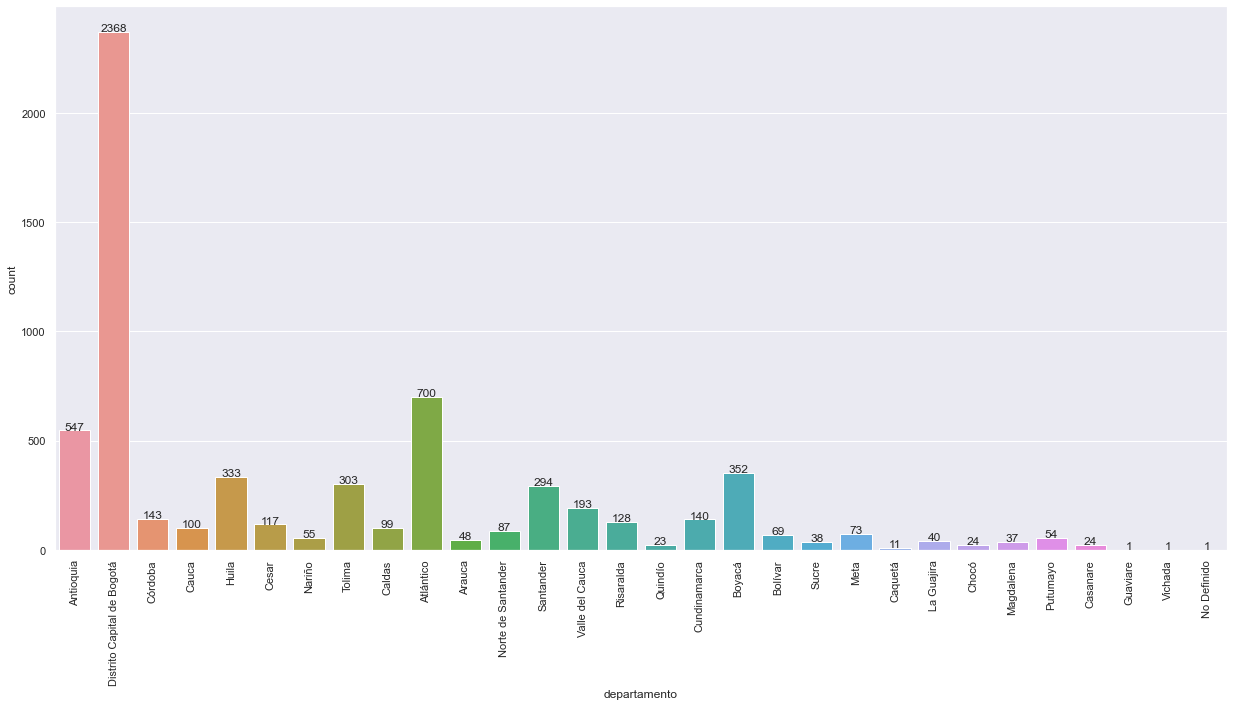

In [42]:
fig, ax= plt.subplots(figsize=(21,10))
ax = sns.countplot(x="departamento", data=contratos_altos) # for Seaborn version 0.7 and more
plt.xticks(rotation=90, horizontalalignment="center")
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2.,
            height+3 ,
            '{:1.0f}'.format(height),
            ha="center") 

Porcentajes de contratos de alto valor por region 

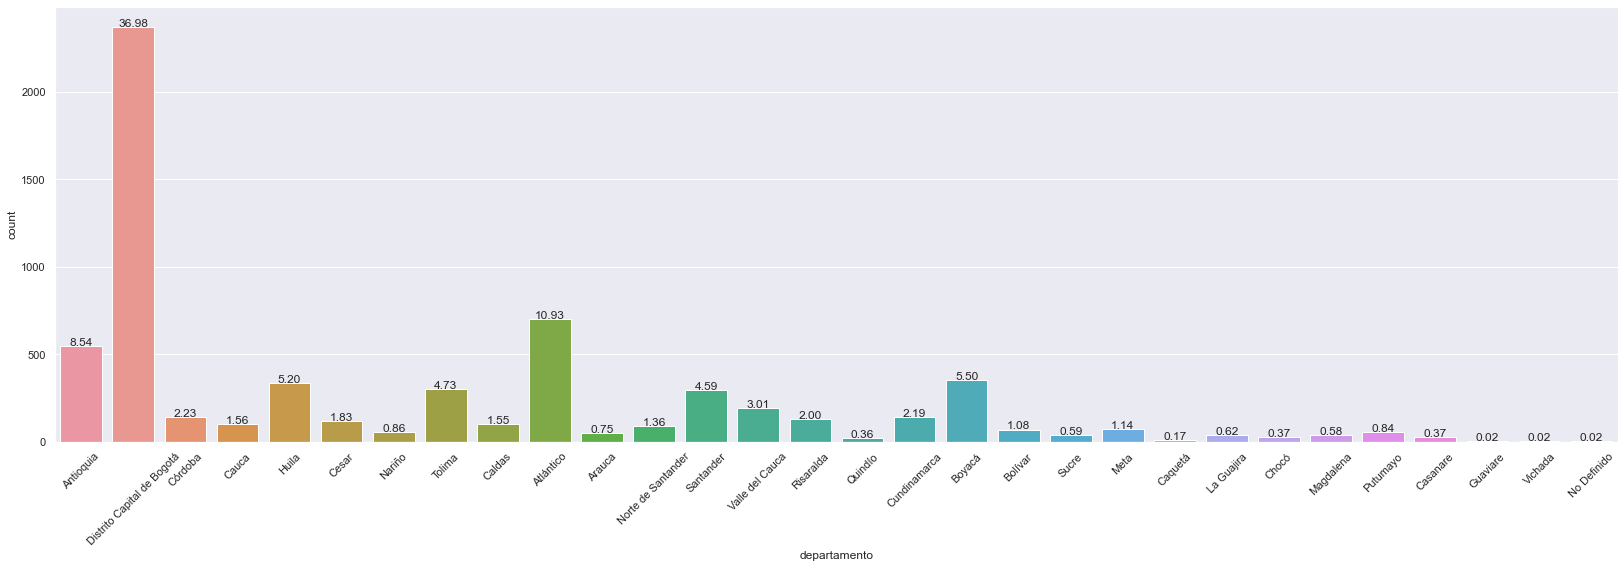

In [43]:
total = len(contratos_altos['departamento'])
fig, ax= plt.subplots(figsize=(28,8))
ax = sns.countplot(x="departamento", data=contratos_altos) # for Seaborn version 0.7 and more
#ax.set(ylim=(0,1400))
plt.xticks(rotation=45, horizontalalignment="center")
sns.set(rc={'figure.figsize':(20,8.27)})
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2.,
            height + 3,
            '{:1.2f}'.format((height/total)*100),
            ha="center") 

Valor total por departamento de contratos de alto valor en el sector servicios públicos

In [60]:
df_c_altos_departamento=contratos_altos.groupby(['departamento'],as_index=False,sort= True)['valor_del_contrato'].sum()
df_c_altos_departamento

,departamento,valor_del_contrato
0,Antioquia,429740028148
1,Arauca,18492491894
2,Atlántico,498165291858
3,Bolívar,100504493617
4,Boyacá,229016572674
5,Caldas,31569237771
6,Caquetá,1393211306
7,Casanare,61930081510
8,Cauca,75103298759
9,Cesar,124407393162


Cantidad de contratos de alto valor por rama 

In [45]:
df_alto_val_rama = contratos_altos['rama'].value_counts(sort=True)
df_alto_val_rama_count=pd.DataFrame(df_alto_val_rama)
df_alto_val_rama_count

,rama
Ejecutivo,6002
Corporación Autónoma,366
Judicial,28
Legislativo,7


porcentaje de contratos alto valor por rama de acuerdo con la cantidad

([<matplotlib.patches.Wedge at 0x17811f2ea60>,
 [Text(-1.1768489126706414, 0.2345775708500902, 'Ejecutivo'),
  Text(1.1726472951389522, -0.2547514891090912, 'Corporación Autónoma'),
  Text(1.1997452180887118, -0.02472674004534195, 'Judicial'),
  Text(2.399985844736282, -0.008242879683517137, 'Legislativo')],
 [Text(-0.6864951990578742, 0.13683691632921927, '93.74 %'),
  Text(0.684044255497722, -0.1486050353136365, '5.72 %'),
  Text(0.6998513772184151, -0.014423931693116135, '0.44 %'),
  Text(1.8999887937495563, -0.0065256130827844, '0.11 %')])

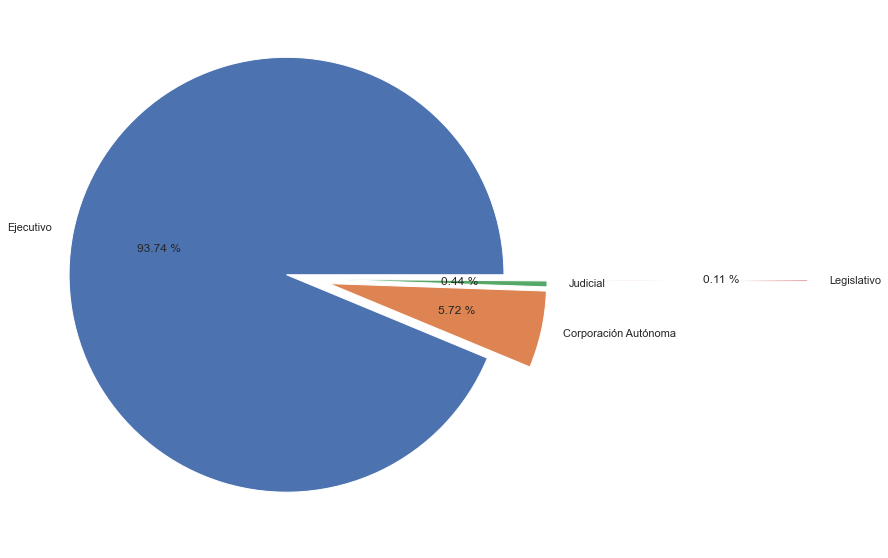

In [46]:
l=['Ejecutivo','Corporación Autónoma','Judicial','Legislativo']
fig, ax= plt.subplots(figsize=(15,10))
desfase = (0.1,0.1,0.1,1.3)
ax.pie(df_alto_val_rama_count['rama'], labels=l, autopct="%0.2f %%",center=(0, 0),explode=desfase)

In [47]:
df_alto_val_contrat = contratos_altos['estado_contrato'].value_counts(sort=True)
df_alto_val_contrat_count=pd.DataFrame(df_alto_val_contrat)
df_alto_val_contrat_count

,estado_contrato
Modificado,2138
En ejecución,1858
Activo,1140
terminado,500
Borrador,288
Cerrado,134
En aprobación,107
enviado Proveedor,94
Suspendido,87
cedido,57


Porcentaje de cantidad de contratos de alto valor por estado del contrato 

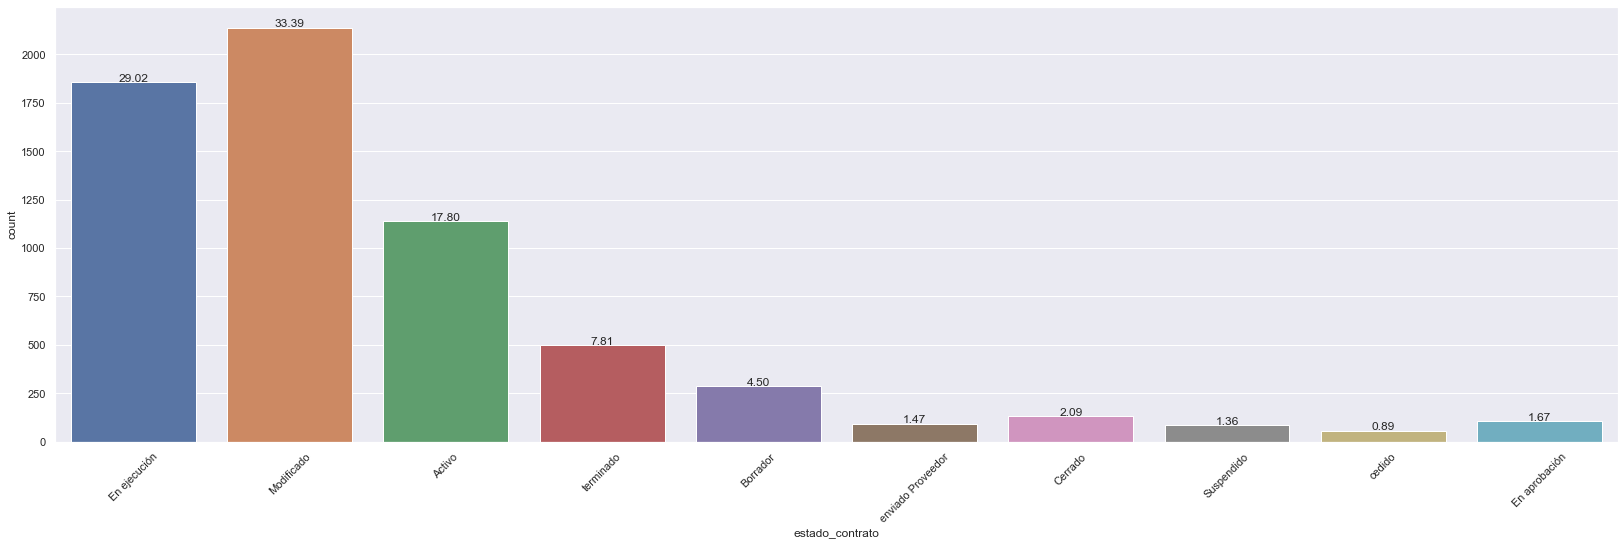

In [48]:
total = len(contratos_altos['estado_contrato'])
fig, ax= plt.subplots(figsize=(28,8))
ax = sns.countplot(x="estado_contrato", data=contratos_altos) # for Seaborn version 0.7 and more
#ax.set(ylim=(0,1400))
plt.xticks(rotation=45, horizontalalignment="center")
sns.set(rc={'figure.figsize':(20,8.27)})
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2.,
            height + 3,
            '{:1.2f}'.format((height/total)*100),
            ha="center") 

### cuarto punto 

En este punto se tomarán los contratos que no se consideran como atípicos de alto valor 

In [49]:
q3, q1 = np.percentile(DF_2['valor_del_contrato'], [75 ,25])
atipico = (q3 - q1)*1.5
contratos_no_atipicos=DF_2[DF_2['valor_del_contrato']<atipico]

In [50]:
contratos_no_atipicos

,orden,rama,departamento,tipo_de_contrato,estado_contrato,referencia_del_contrato,id_contrato,fecha_de_inicio_del_contrato,valor_del_contrato,fecha_de_fin_del_contrato,Año
14,Territorial,Ejecutivo,Distrito Capital de Bogotá,Prestación de servicios,Modificado,4233000-142-2021,CO1.PCCNTR.2154554,2021-01-22,26883774,2021-12-30T00:00:00.000,2021
17,Territorial,Ejecutivo,Cundinamarca,Prestación de servicios,En ejecución,CO1.PCCNTR.3169758,CO1.PCCNTR.3169758,2022-01-07,35814220,2022-12-21T00:00:00.000,2022
24,Territorial,Ejecutivo,Risaralda,Prestación de servicios,En ejecución,3999-2021,CO1.PCCNTR.2747502,2021-08-11,8866667,2021-12-30T00:00:00.000,2021
31,Territorial,Ejecutivo,Meta,Prestación de servicios,En ejecución,1230 DE 2021,CO1.PCCNTR.2705309,2021-07-30,7700000,2021-11-13T00:00:00.000,2021
48,Territorial,Ejecutivo,Cundinamarca,Prestación de servicios,Modificado,CPS-650-2021,CO1.PCCNTR.2596631,2021-06-18,9750000,2021-12-31T00:00:00.000,2021
...,...,...,...,...,...,...,...,...,...,...,...
149965,Territorial,Ejecutivo,Atlántico,Prestación de servicios,En ejecución,CD-12-2021-3909,CO1.PCCNTR.2737561,2021-08-09,5400000,2021-10-31T00:00:00.000,2021
149968,Territorial,Ejecutivo,Valle del Cauca,Prestación de servicios,En ejecución,203-13-02-001,CO1.PCCNTR.3182524,2022-01-07,32000000,2022-09-07T00:00:00.000,2022
149975,Territorial,Ejecutivo,Distrito Capital de Bogotá,Prestación de servicios,Modificado,90-2018 CPS. AG (32404),CO1.PCCNTR.273399,2018-01-08,24933333,2018-12-21T00:00:00.000,2018
149983,Territorial,Ejecutivo,Valle del Cauca,Prestación de servicios,Modificado,1.440-12.14-0069,CO1.PCCNTR.2706552,2021-07-27,10800000,2021-12-31T00:00:00.000,2021


Cantidad de contratos por municipio, excluyendo los contratos de alto valor 

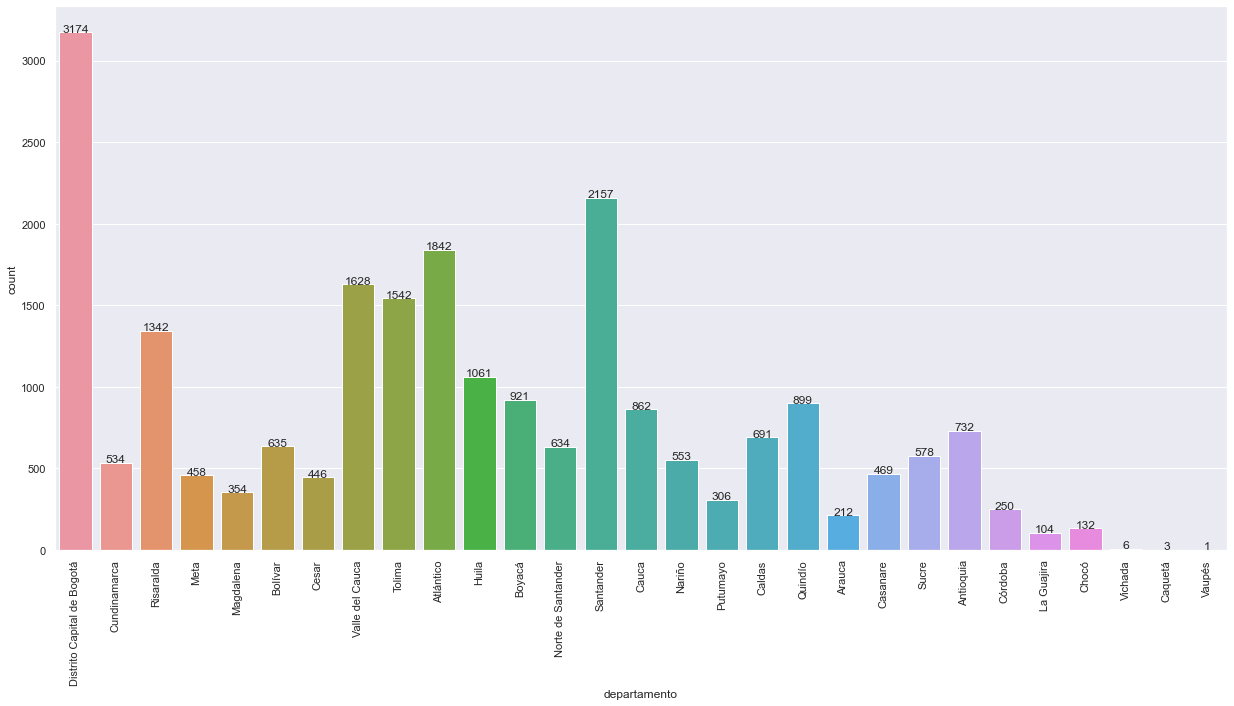

In [51]:
fig, ax= plt.subplots(figsize=(21,10))
ax = sns.countplot(x="departamento", data=contratos_no_atipicos) # for Seaborn version 0.7 and more
plt.xticks(rotation=90, horizontalalignment="center")
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2.,
            height+3 ,
            '{:1.0f}'.format(height),
            ha="center") 

Porcentaje de cantidad de contratos por departamento 

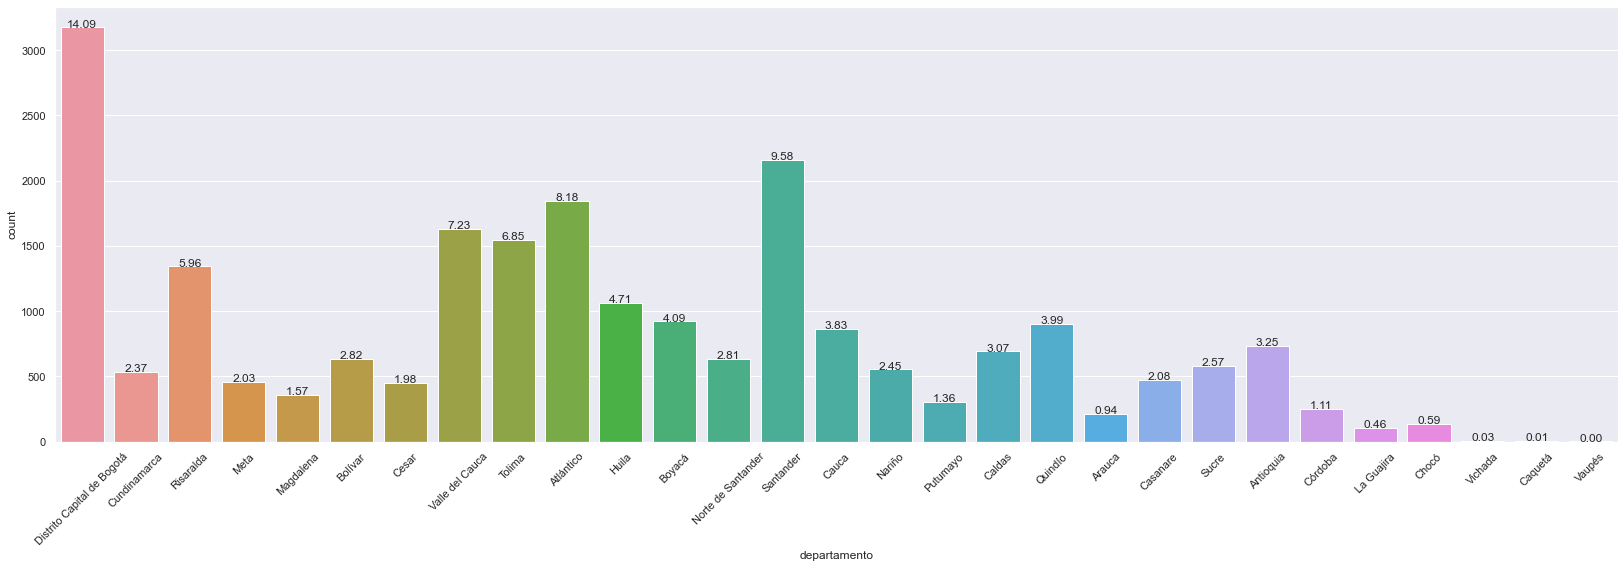

In [52]:
total = len(contratos_no_atipicos['departamento'])
fig, ax= plt.subplots(figsize=(28,8))
ax = sns.countplot(x="departamento", data=contratos_no_atipicos) # for Seaborn version 0.7 and more
#ax.set(ylim=(0,1400))
plt.xticks(rotation=45, horizontalalignment="center")
sns.set(rc={'figure.figsize':(20,8.27)})
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2.,
            height + 3,
            '{:1.2f}'.format((height/total)*100),
            ha="center") 

Valor total de contratos por departamento 

In [63]:
df_contratos_no_atipicos_c=contratos_no_atipicos.groupby(['departamento'],as_index=False,sort= True)['valor_del_contrato'].sum()
df_contratos_no_atipicos_c

,departamento,valor_del_contrato
0,Antioquia,10602429356
1,Arauca,1602683323
2,Atlántico,31053701471
3,Bolívar,9509800743
4,Boyacá,14799667184
5,Caldas,6392914320
6,Caquetá,9019200
7,Casanare,4840343320
8,Cauca,11200929812
9,Cesar,5801577363


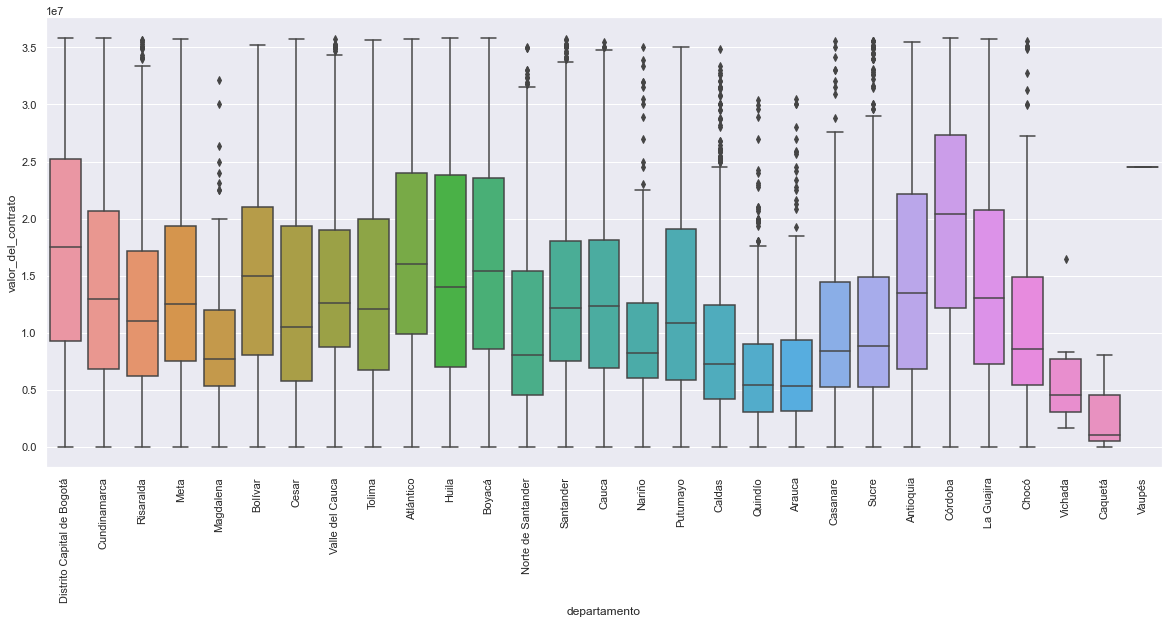

In [54]:
ax = sns.boxplot(x="departamento", y="valor_del_contrato", data=contratos_no_atipicos)
plt.xticks(rotation=90)
sns.set(rc={'figure.figsize':(20,8.27)})

cantidad de contratos con valores no atipicos por rama 

In [55]:
df_contratos_no_atipicos_ram = contratos_no_atipicos['rama'].value_counts(sort=True)
df_contratos_no_atipicos_ram_count=pd.DataFrame(df_contratos_no_atipicos_ram)
df_contratos_no_atipicos_ram_count

,rama
Ejecutivo,21480
Corporación Autónoma,981
Judicial,34
Legislativo,31


Porcentaje de cantidad de contratos con valores no atipicos por rama 

([<matplotlib.patches.Wedge at 0x178130bc1c0>,
 [Text(-1.1872539387729906, 0.17443647803146017, 'Ejecutivo'),
  Text(1.1856238653615343, -0.18519192715983762, 'Corporación Autónoma'),
  Text(1.1998924472141776, -0.016065961482965213, 'Judicial'),
  Text(2.3999775692198786, -0.010376282640920581, 'Legislativo')],
 [Text(-0.6925647976175778, 0.10175461218501843, '95.36 %'),
  Text(0.691613921460895, -0.10802862417657193, '4.35 %'),
  Text(0.6999372608749368, -0.00937181086506304, '0.15 %'),
  Text(1.8999822422990704, -0.008214557090728793, '0.14 %')])

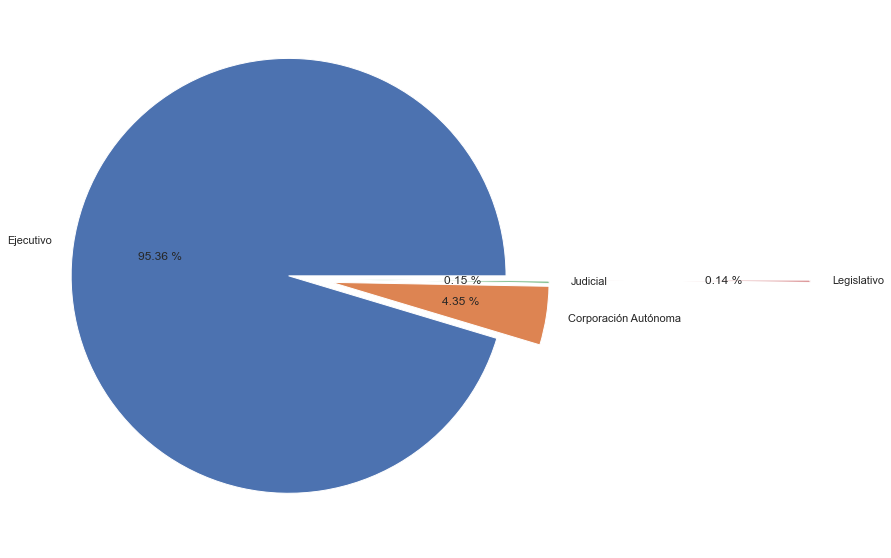

In [56]:
l=['Ejecutivo','Corporación Autónoma','Judicial','Legislativo']
fig, ax= plt.subplots(figsize=(15,10))
desfase = (0.1,0.1,0.1,1.3)
ax.pie(df_contratos_no_atipicos_ram_count['rama'], labels=l, autopct="%0.2f %%",center=(0, 0),explode=desfase)

Cantidad de contratos no atipicos por estado del contrato

In [57]:
df_contratos_no_atipicos = contratos_no_atipicos['estado_contrato'].value_counts(sort=True)
df_contratos_no_atipicos_count=pd.DataFrame(df_contratos_no_atipicos)
df_contratos_no_atipicos_count

,estado_contrato
En ejecución,10420
Modificado,3563
Activo,3208
terminado,2658
Cerrado,1070
Borrador,967
En aprobación,259
enviado Proveedor,239
cedido,115
Suspendido,17


Porcentaje de cantidad de contratos no atipicos por estado del contrato

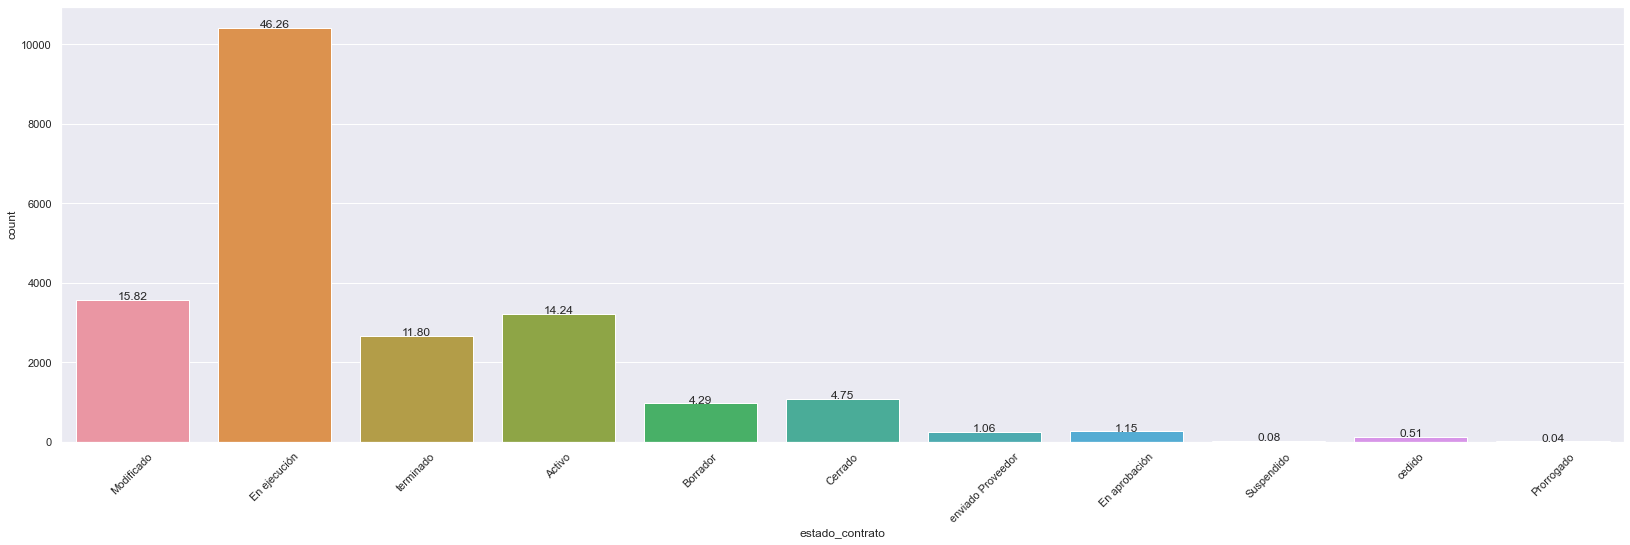

In [58]:
total = len(contratos_no_atipicos['estado_contrato'])
fig, ax= plt.subplots(figsize=(28,8))
ax = sns.countplot(x="estado_contrato", data=contratos_no_atipicos) # for Seaborn version 0.7 and more
#ax.set(ylim=(0,1400))
plt.xticks(rotation=45, horizontalalignment="center")
sns.set(rc={'figure.figsize':(20,8.27)})
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2.,
            height + 3,
            '{:1.2f}'.format((height/total)*100),
            ha="center") 

### Quinto punto

#### Observaciones

-	De todos los contratos electrónicos correspondientes al sector servicios públicos la mayor cantidad se encuentra en el departamento de Bogotá con un 19.16% lo cual equivale a 5542 contratos.
-	Caquetá, Guaviare, Vaupés y vichada son los departamentos con menos contratos correspondientes al sector de servicios públicos con un porcentaje menor al 0.5%. 
-	Los contratos electrónicos correspondientes al sector de servicios públicos pertenecen en su mayoría a la rama ejecutiva con un 95% equivalente a 27482 contratos.
-	La mayoría de los contratos electrónicos del sector servicios públicos corresponden al orden territorial con un 92.38% correspondiente a 26724 contratos.
-	Los contratos electrónicos correspondientes al sector servicios públicos en su mayoría pertenecen al tipo prestación de servicios con un 88.33 % lo cual equivale a 2552.
-	Las pymes no tienden a hacer contratos electrónicos en el sector de servicios públicos, pues solo el 14.60% de los contratos pertenece a estas.
-	se logró identificar que Bogotá sigue siendo el departamento con la mayor cantidad de contratos equivalente a 5542 y con mayor inversión del país con 823587058727846 COP, teniendo en cuenta únicamente los contratos de alto valor.
-	En los contratos de mayor valor la rama ejecutiva sigue siendo la que más contratos tiene con un 93%. 
-	Teniendo en cuenta únicamente los contratos de mayor valor se observó que la mayoría de estos contratos están en estado de modificación.
-	Al excluir los contratos de alto valor se sigue viendo a Bogotá como el municipio con mayor cantidad de contratos con 3174 y con mayor inversión con 54964512278 COP 

- Al no incluir los contratos de alto valor en Bogotá se puede observar que no hay contratos con  valores atípicos, sin embargo Magdalena, Risaralda, valle del Cauca, Santander, Nariño, Caldas, Quindío, Arauca y chocó se observa una gran cantidad de contratos con valores atípicos para la región es decir que para lo que se acostumbra a ver en la región hay contratos con cifras muy superiores a lo habitual.

- La mayoría de los contratos electrónicos que no son considerados de alto valor  se encuentran en ejecución con un 46,26% a diferencia de los de alto valor que tienen un 29,02 % en ejecución y la mayoría se encuentra en un proceso de modificación. 

#### Recomendaciones 

- Se recomienda revisar la contratación electrónica en departamentos como: Caquetá, Guaviare, Vaupés y vichada, pues la cantidad de contratos electrónicos en estos departamentos es mínima en comparación con el resto del país, así mismo se debe incentivar mediante campañas la generación de estos contratos

-  se puede evidencia que en cuanto a contratos electrónicos en el país la inversión se centra en la capital de Bogotá y en departamentos como el valle del Cauca, Medellín y Santander, es por eso que se debe incentivar a la inversión en zonas alejadas y en ciudades diferentes a las principales.

- Es importante estimular la inversión en contratos electrónicos en el sector de servicios públicos en diferentes ramas como la legislativa, corporación autónoma y judicial. Pues la mayoría de contratos electrónicos del área de servicios públicos son de la rama ejecutiva.

- Se debe incentivar a las pymes para que hagan mas contratos electrónicos en el sector de servicios públicos
